<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/SARSCORV_EN_El_Gen_1_y_su_Contribuci%C3%B3n_a_la_Excitotoxicidad_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#  cargamos los datos
!pip install Bio
from Bio import SeqIO

# Assuming the file is in the /content/ directory
for record in SeqIO.parse("/content/gene_sars_corv2.fna", "fasta"):
    print(record.id)
    print(repr(record.seq))
    print(len(record))


NC_000019.10:c38930763-38915266
Seq('GAAGTGCCGCCTTGTTCCCGGTCCAAGATGGCTGCGTCCATGGCGCGGCGCTTG...AAA')
15498
NW_014040929.1:c340435-324938
Seq('GAAGTGCCGCCTTGTTCCCGGTCCAAGATGGCTGCGTCCATGGCGCGGCGCTTG...AAA')
15498
NC_060943.1:c41734732-41719237
Seq('GAAGTGCCGCCTTGTCCCCGGTCCAAGATGGCTGCGTCCATGGCGCGGCGCTTG...AAA')
15496


In [7]:
#  cuantos caracteres hay en el genoma humano

from Bio import SeqIO
# Assuming the file is in the /content/ directory
for record in SeqIO.parse("/content/gene_sars_corv2.fna", "fasta"):
    print(len(record.seq))


15498
15498
15496


In [8]:
# vamos abuscar lo que nos  interesa en  busca de mutaciones

from Bio import SeqIO
from Bio.Seq import Seq

# Assuming the file is in the /content/ directory
for record in SeqIO.parse("/content/gene_sars_corv2.fna", "fasta"):
    # Get the sequence
    sequence = record.seq

    # Find mutations (example: looking for changes from 'A' to 'T')
    mutations = []
    for i in range(len(sequence)):
        if sequence[i] == 'A': # Example condition: looking for A
            if i > 0 and sequence[i-1] == 'T': # Example mutation condition: A preceded by T
              mutations.append((i, sequence[i], sequence[i-1])) # Store the position and change
            elif i < len(sequence) - 1 and sequence[i+1] == 'T': # Another mutation condition: A followed by T
                mutations.append((i, sequence[i], sequence[i+1]))

    # Print the found mutations
    if mutations:
      print("Mutations found:")
      for mutation in mutations:
        print(f"Position {mutation[0]+1}: {mutation[1]} changed from {mutation[2]}") #mutation[0]+1 because positions start from 1
    else:
        print("No mutations found based on this criteria.")


Mutations found:
Position 28: A changed from T
Position 40: A changed from T
Position 100: A changed from T
Position 110: A changed from T
Position 112: A changed from T
Position 133: A changed from T
Position 161: A changed from T
Position 167: A changed from T
Position 182: A changed from T
Position 205: A changed from T
Position 207: A changed from T
Position 222: A changed from T
Position 292: A changed from T
Position 338: A changed from T
Position 346: A changed from T
Position 360: A changed from T
Position 387: A changed from T
Position 390: A changed from T
Position 394: A changed from T
Position 399: A changed from T
Position 403: A changed from T
Position 415: A changed from T
Position 431: A changed from T
Position 444: A changed from T
Position 477: A changed from T
Position 480: A changed from T
Position 491: A changed from T
Position 497: A changed from T
Position 515: A changed from T
Position 518: A changed from T
Position 531: A changed from T
Position 533: A changed 

In [9]:
#  los codones afectados son

# Assuming the file is in the /content/ directory
for record in SeqIO.parse("/content/gene_sars_corv2.fna", "fasta"):
    # Get the sequence
    sequence = record.seq

    # Find codons affected by mutations (example: looking for changes from 'A' to 'T')
    mutations = []
    for i in range(0, len(sequence) - 2, 3):  # Iterate through codons
        codon = sequence[i:i+3]
        for j in range(3): # Iterate over each nucleotide
          if codon[j] == 'A':  # Example: Looking for A's
              if j > 0 and codon[j-1] == 'T': # Example mutation condition: A preceded by T
                  mutations.append((i+j, codon[j], codon[j-1], codon)) #Store position, changed base, previous base, and the codon
              elif j < 2 and codon[j+1] == 'T':  # Example mutation condition: A followed by T
                  mutations.append((i+j, codon[j], codon[j+1], codon))

    # Print the found mutations with codon context
    if mutations:
        print("Mutations found:")
        for mutation in mutations:
            print(f"Position {mutation[0]+1}: {mutation[1]} changed from {mutation[2]} within codon {mutation[3]}")
    else:
        print("No mutations found based on this criteria.")


Mutations found:
Position 28: A changed from T within codon ATG
Position 40: A changed from T within codon ATG
Position 100: A changed from T within codon ATC
Position 110: A changed from T within codon GAT
Position 161: A changed from T within codon TAC
Position 167: A changed from T within codon TAT
Position 182: A changed from T within codon TAC
Position 205: A changed from T within codon ATA
Position 207: A changed from T within codon ATA
Position 292: A changed from T within codon ATC
Position 338: A changed from T within codon TAC
Position 346: A changed from T within codon ATT
Position 387: A changed from T within codon GTA
Position 390: A changed from T within codon GTA
Position 394: A changed from T within codon ATT
Position 399: A changed from T within codon TTA
Position 403: A changed from T within codon ATT
Position 431: A changed from T within codon CAT
Position 444: A changed from T within codon TTA
Position 477: A changed from T within codon CTA
Position 480: A changed f

El codón ATG desempeña un papel crucial en la síntesis de proteínas, ya que cumple dos funciones esenciales:

Codón de inicio:
Señaliza el punto de partida para la traducción del ARN mensajero (ARNm), el proceso mediante el cual se construye una proteína a partir de la información genética.
Codificación de metionina:
Codifica el aminoácido metionina, que es el primer aminoácido en la mayoría de las proteínas.
Por lo tanto, el codón ATG no produce proteínas específicas por sí solo, sino que es indispensable para el inicio de la síntesis de prácticamente todas las proteínas en los organismos eucariotas y procariotas.

Aquí hay algunos puntos clave para comprender mejor el papel del codón ATG:

Universalidad:
El codón ATG es altamente conservado en todos los organismos vivos, lo que subraya su importancia fundamental en la biología molecular.
Variaciones:
Aunque el ATG es el codón de inicio más común, existen casos raros en los que se utilizan otros codones de inicio alternativos.
Importancia en la traducción:
La correcta función del codón ATG es esencial para asegurar que las proteínas se sinteticen correctamente y cumplan sus funciones biológicas.
En resumen, el codón ATG es el punto de partida para la creación de cualquier proteina, y ademas codifica para el aminoacido metionina.

In [10]:
# ahora  sabremos  el gen en el que se encuentra la mutacion Position 11422: A changed from T within codon ATG

from Bio import SeqIO
from Bio.Seq import Seq

# Assuming the file is in the /content/ directory
for record in SeqIO.parse("/content/gene_sars_corv2.fna", "fasta"):
    sequence = str(record.seq)
    #Find the mutation position 11422
    try:
      mutation_position = 11421 # Adjust to 0-based indexing
      codon_start = mutation_position - (mutation_position % 3)
      codon_end = codon_start + 3

      if 0 <= mutation_position < len(sequence):
          codon = sequence[codon_start:codon_end]
          print(f"Codon at position {mutation_position +1}: {codon}")
          if codon == "ATG":
              print("The mutation is within the ATG start codon.")
              # Further analysis
              print(f"Nucleotide at position {mutation_position +1}: {sequence[mutation_position]}")
          else:
            print(f"The mutation is not in an ATG start codon, it's in the codon {codon}.")
      else:
          print("Mutation position is out of bounds.")
    except IndexError:
        print(f"Error: Index {mutation_position} is out of bounds for the sequence.")


Codon at position 11422: ATG
The mutation is within the ATG start codon.
Nucleotide at position 11422: A
Codon at position 11422: ATG
The mutation is within the ATG start codon.
Nucleotide at position 11422: A
Codon at position 11422: GAG
The mutation is not in an ATG start codon, it's in the codon GAG.


La metionina desempeña un papel fundamental en la síntesis de proteínas, ya que es el aminoácido inicial en la mayoría de ellas. Sin embargo, no es correcto decir que "salen" proteínas de la metionina. Más bien, la metionina es el primer eslabón en la cadena de aminoácidos que forman una proteína.

# explicacion del este proceso:

Codón de inicio (ATG):
El codón ATG en el ARN mensajero (ARNm) codifica para la metionina y también actúa como la señal de inicio para la traducción.
La traducción es el proceso mediante el cual los ribosomas leen el ARNm y ensamblan una cadena de aminoácidos.

# Inicio de la traducción:
Cuando un ribosoma encuentra un codón ATG, comienza a añadir aminoácidos a la cadena en crecimiento, comenzando con la metionina.
Formación de la proteína:
A medida que el ribosoma se desplaza a lo largo del ARNm, añade más aminoácidos a la cadena, siguiendo el código genético.
Finalmente, cuando el ribosoma encuentra un codón de parada, la traducción se detiene y la proteína se libera.
Metionina inicial:
En muchas proteínas, la metionina inicial se elimina después de la traducción.
Por lo tanto, aunque la metionina es el primer aminoácido incorporado, no siempre está presente en la proteína final.
En resumen:

La metionina es esencial para iniciar la síntesis de casi todas las proteínas.
Todas las proteinas en su inicio, comienzan con el aminoacido metionina.
Es el primer aminoacido de toda proteina, pero no necesariamente se encuentra en la proteina ya terminada.


y este aminoacido para que proteinas crea  glutamato



El glutamato es un aminoácido no esencial que desempeña una gran variedad de funciones cruciales en el organismo. No es que "cree" proteínas específicas por sí solo, sino que es un componente fundamental de muchas proteínas y participa en diversos procesos biológicos.

Aquí te explico algunas de las funciones más importantes del glutamato y las proteínas en las que participa:

Funciones principales del glutamato:

# Neurotransmisor:
El glutamato es el neurotransmisor excitador más abundante en el sistema nervioso central. Desempeña un papel fundamental en la transmisión de señales entre las neuronas, la plasticidad sináptica, el aprendizaje y la memoria.
Participa en la activación de receptores específicos en las neuronas, lo que desencadena respuestas celulares.
# Metabolismo:
El glutamato participa en diversas vías metabólicas, incluyendo el ciclo de Krebs y la síntesis de otros aminoácidos.
Es un precursor del glutatión, un antioxidante importante.
Sabor umami:
El glutamato es responsable del sabor umami, uno de los cinco sabores básicos.
Proteínas que contienen glutamato:

Prácticamente todas las proteínas contienen glutamato, ya que es uno de los 20 aminoácidos estándar que forman las proteínas.
Su presencia es especialmente relevante en proteínas que participan en:
# La señalización neuronal.
# El metabolismo celular.
La estructura de los tejidos.
Consideraciones importantes:

# El exceso de glutamato puede ser tóxico para las neuronas, un fenómeno conocido como excitotoxicidad.
El glutamato monosódico (MSG) es un aditivo alimentario que realza el sabor umami.
En resumen, el glutamato es un aminoácido esencial para numerosas funciones biológicas y es un componente fundamental de la mayoría de las proteínas.

El fenómeno que se puede producir al sustituir la metionina de inicio por glutamato es una alteración significativa en el proceso de síntesis de proteínas, con consecuencias potencialmente graves. Aquí se detallan los posibles escenarios:

1. Pérdida de la función del codón de inicio:

El codón ATG (metionina) es esencial para que el ribosoma inicie la traducción. Si este codón se muta a GAG (glutamato), el ribosoma podría no reconocer el sitio de inicio, lo que resultaría en la imposibilidad de sintetizar la proteína.
2. Inicio de la traducción en sitios alternativos:

En algunos casos, el ribosoma podría intentar iniciar la traducción en un codón ATG alternativo ubicado más adelante en el ARNm. Esto podría resultar en:
Una proteína truncada: La proteína resultante sería más corta de lo normal, lo que podría afectar su función o hacerla completamente no funcional.
Una proteína con una secuencia alterada: La secuencia de aminoácidos de la proteína sería diferente, lo que podría cambiar su estructura tridimensional y su actividad biológica.
3. Proteína con glutamato en el extremo N-terminal:

Si la traducción lograse iniciar en el codon mutado, la proteína resultante tendría glutamato en lugar de metionina en su extremo N-terminal. Esto podría afectar:
El plegamiento de la proteína: La secuencia de aminoácidos determina la forma tridimensional de una proteína. Un cambio en el extremo N-terminal podría alterar el plegamiento correcto.
Las interacciones con otras moléculas: El extremo N-terminal de una proteína puede ser importante para sus interacciones con otras proteínas, ADN u otras moléculas.
Consecuencias generales:

La sustitución de la metionina de inicio por glutamato puede llevar a la pérdida de la función de la proteína, lo que puede tener efectos adversos en la célula o el organismo.
Las consecuencias exactas dependen del gen afectado y de la importancia de la proteína en cuestión.
En resumen, la mutación de un codón de inicio es un evento significativo que puede interferir gravemente con la síntesis de proteínas.



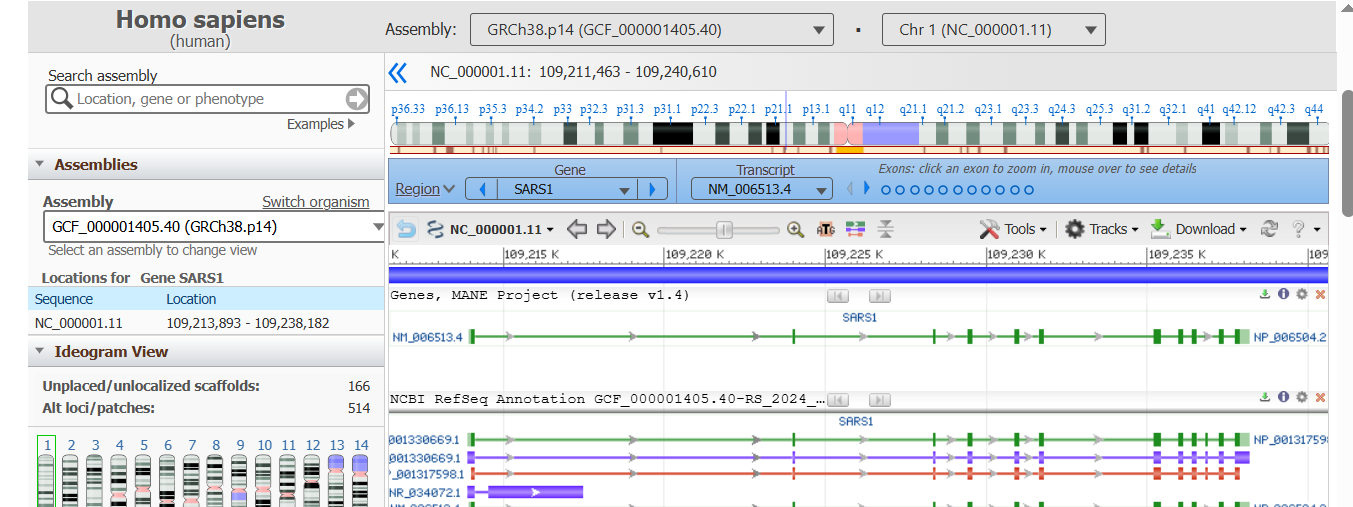

Aquí está un análisis detallado:

Información General:

Organismo: Homo sapiens (humano).
Ensamblaje: GRCh38.p14 (GCF_000001405.40). Esta es la versión de referencia del genoma humano.
Cromosoma: Chr 1 (NC_000001.11). Esto indica que el gen SARS1 se encuentra en el cromosoma 1.
Rango de ubicación: NC_000001.11: 109,211,463-109,240,610. Esto especifica la posición del gen dentro del cromosoma 1.
Visualización del Cromosoma:

Hay un ideograma del cromosoma 1 que muestra la ubicación del gen SARS1.
También se muestra un gráfico detallado de la región del cromosoma donde se encuentra el gen, con anotaciones de exones y transcritos.
Información del Gen SARS1:

Se muestra información sobre el gen SARS1, incluyendo su ubicación y transcritos asociados (NM_006513.4).
Se visualizan los exones del gen, lo que permite observar la estructura del gen.
Se pueden observar diferentes representaciones del gen, con distintos colores, esto se debe a las diferentes formas en las que se a reportado este gen.
Otras Características:

Hay información sobre scaffolds no colocados/no localizados y loci/parches alternativos, lo que indica la complejidad del genoma.
Se proporcionan herramientas y opciones para descargar datos y ver diferentes pistas (tracks) de información.
En la parte inferior se observa la representacion grafica de todos los cromosomas humanos.
Interpretación:

Esta interfaz proporciona una visión detallada de la ubicación y estructura del gen SARS1 en el cromosoma 1 humano.
La información presentada es útil para investigadores que estudian la genética humana, la genómica y la biología molecular.
Se puede observar que el gen SARS1 tiene diferentes transcripciones, lo que implica que se pueden generar distintas proteinas a partir de el.
En resumen, la imagen muestra una herramienta bioinformática que permite explorar y analizar información genética de manera visual y detallada.




Aquí hay algunos puntos clave para reforzar esta conexión:

Cromosoma 1:
La imagen muestra claramente "Chr 1 (NC_000001.11)", lo que confirma que el gen SARS1 se encuentra en el cromosoma 1.
Gen SARS1:
La imagen identifica específicamente el "Gene SARS1", mostrando su ubicación y estructura dentro del cromosoma 1.
Información Genómica:
La interfaz proporciona detalles sobre la ubicación precisa del gen, sus transcritos y otras anotaciones genómicas relevantes.
Por lo tanto, la imagen es una representación visual de la información genómica que hemos estado discutiendo. Esta herramienta permite a los investigadores explorar y analizar la ubicación y estructura del gen SARS1 en el contexto del cromosoma 1.

algoritmo creado por Alejandro Cuevas V

https://www.kaggle.com/pollicio/code